# Simulation of 1/f Noise and Fractal Estimation

** Jeev Kiriella (jeevooo) **

## Overview:
This notebook is an overview of two functions:
1. noise_generator.py
2. dfa.py

1/f time series can be created using a route outline by Kasdin (1995). Fractal scaling index is scaling parameter that measures self-similarity index of a time-series. The approach taken to calculate the fractal scaling index is a modified root mean square:

<div class="alert alert-block alert-warning">$$F(n)=\sqrt{\frac{1}{N}\sum_{k=1}^N [y(k) - y_n(k)]^2}$$</div>

### References: 

1. Kasdin, N.J. (1995). Discrete Simulation of Colored Noise and Stochastic Processes and 1/f^a Power Law Noise Generation (1995). _Proceedings of the IEEE_. 83(5), 804-827.
2. Hausdorff, J. M. (1995). Is Walking a Random Walk? Evidence of Long-range Correlations in Stride Interval of Human Gait. _Journal of Applied Physiology_. 78(1), 349-358. 



### 1. Start With Importing noise_generator Function.

In [ ]:
from noise_generator import noise_generator

### 2. Call noise_generator Function With Args.

In [51]:
## Parameters
n = 256
mean = 1.0
std = 0.02
fractindex = 0.75

## Function call.
#noise_generator(n, mean, std, fractindex) 

### Full Function Displayed:

In [2]:
def noise_generator(n, mean, std, fractindex):
    
    """
    1/f Noise simulation based on Kasdin (1995). 
    
    Input (arguments):
     n - number of desired data points (n should be a power of 2) for series (int).
     mean - series mean (int).
     std - series standard deviation (int).
     fractindex - desired fractal index for simulated series (int: range: 0-2).
    
    Output (return):
     x - numpy array of length n with mean, std, fractindex specified. 
     
    """
    if fractindex not in VALID_FRACT:
        raise ValueError("results: status must be one of %r." % VALID_FRACT)
    
    stdev = std
    
    b = 2*fractindex-1
    print('beta: ', b)
    
    bdis = np.zeros(n)
    
    # create long-tail distribution
    bdis[0] = 1
    for i in range(1,n):
        bdis[i] = bdis[i-1] * (0.5 * b + (i-1))/i # note that b is the shape parementer (b)

    plt.plot(bdis)
    plt.show

    wnt = np.random.normal(mean, stdev, size = n)
    print('WhiteNoise Stdev: ', np.std(wnt))
    plt.plot(wnt)
    plt.show()

    bdis_freq = np.fft.fft(bdis)
    wnt_freq = np.fft.fft(wnt)

    bdis_freq = bdis_freq[1:n+1]
    wnt_freq = wnt_freq[1:n+1]

    freq_total = bdis_freq * wnt_freq
    
    unique = n/2 + 1
    unique = int(unique)
    j = np.arange(1, unique)
    
    ## If the desired fractal index is >1.0 then divide by j if <= then j^2
    if fractindex > 1.0:
        j = j
    elif fractindex <= 1.0:
        j = j**0.5
    
    ft_half1 = freq_total[1:unique]/j

    real = np.real(freq_total[1:unique+1])
    real = np.flip(real, axis=0)

    imaginary = np.imag(freq_total[1:unique+1])
    imaginary = np.flip(imaginary, axis=0)
    imaginary = 1j * imaginary

    ft_half2 = real - imaginary

    ft = np.hstack((ft_half1, ft_half2))
    
    x = np.fft.ifft(ft)
    x = np.real(x[:n])

    mean_diff = mean - np.mean(x)
    x = mean_diff + x
    print(np.mean(x))
    print(np.std(x))
    plt.plot(x)
    plt.show()
    
    return x

#### a) Create a Pareto distribution of coefficients.

beta:  0.5


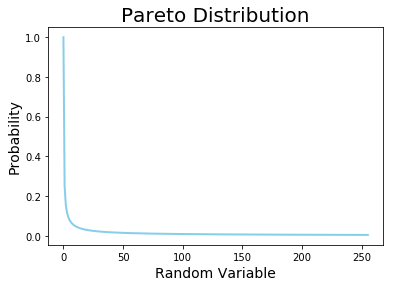

In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt


stdev = std
    
b = 2*fractindex-1
print('beta: ', b)
    
bdis = np.zeros(n)
    
# create long-tail distribution
bdis[0] = 1
for i in range(1,n):
    bdis[i] = bdis[i-1] * (0.5 * b + (i-1))/i 

plt.plot(bdis, color = "skyblue", linewidth=2.0)
plt.title('Pareto Distribution', fontsize=20)
plt.xlabel('Random Variable', fontsize=14)
plt.ylabel('Probability',  fontsize=14)
plt.show()


#### b) Create white noise vector.

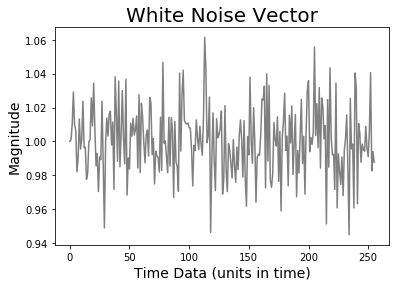

In [53]:
wnt = np.random.normal(mean, stdev, size = n)

plt.plot(wnt, color = "grey")
plt.title("White Noise Vector", fontsize=20)
plt.xlabel('Time Data (units in time)', fontsize=14)
plt.ylabel('Magnitude',  fontsize=14)
plt.show()

#### c) Transform data into frequency spectrum and multiple two complex vectors. 

In [54]:
bdis_freq = np.fft.fft(bdis)
wnt_freq = np.fft.fft(wnt)

bdis_freq = bdis_freq[1:n+1]
wnt_freq = wnt_freq[1:n+1]

freq_total = bdis_freq * wnt_freq

#### d) Divide data in half to obtain unique portion

In [55]:
unique = n/2 + 1
unique = int(unique)
j = np.arange(1, unique)

#### e) Perform 1/f or 1/f^2 multiplication (dependent on input). 

In [56]:
## If the desired fractal index is >1.0 then divide by j if <= then j^2
if fractindex > 1.0:
    j = j
elif fractindex <= 1.0:
    j = j**0.5
    
ft_half1 = freq_total[1:unique]/j

#### f) Prepare half of the data (reflection of other half). 

In [57]:
real = np.real(freq_total[1:unique+1])
real = np.flip(real, axis=0)

imaginary = np.imag(freq_total[1:unique+1])
imaginary = np.flip(imaginary, axis=0)
imaginary = 1j * imaginary

ft_half2 = real - imaginary

ft = np.hstack((ft_half1, ft_half2))

#### g) Transform data back into time domain.

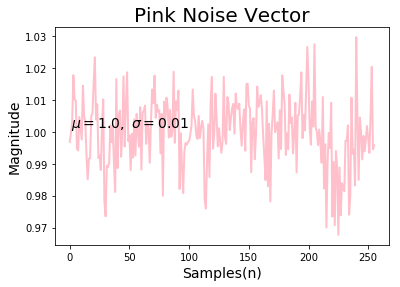

In [58]:
x = np.fft.ifft(ft)
x = np.real(x[:n])

mean_diff = mean - np.mean(x)
x = mean_diff + x

#print(np.mean(x))
#print(np.std(x))

plt.plot(x, color = "pink", linewidth = 2)
plt.title("Pink Noise Vector", fontsize=20)
plt.xlabel('Samples(n)', fontsize=14)
plt.ylabel('Magnitude',  fontsize=14)
plt.text(1, 1, r'$\mu=1.0,\ \sigma=0.01$', horizontalalignment='left', verticalalignment='bottom', fontsize = 14)
plt.show()

### 3. Next Import dfa Function 
> ### Test noise_generator Created Desired 1/f Time Series. 

In [ ]:
from dfa import dfa

### 4. Call dfa Function With Args.

In [59]:
signal = x
box_min = 3
box_max = 30

#dfa(signal, box_min, box_max)

### 5. Full Function Displayed:

In [ ]:
def dfa(signal, box_min, box_max): #Parameters for the defined function
    

        
    ## Plot the input signal ##
    ## Plot the distribution of data points ##
    
    plt.subplot(2, 2, 1)
    plt.plot(signal, color = 'skyblue')
    plt.xlabel('Samples (n)')
    plt.ylabel('Signal Magnitude')
    plt.subplot(2, 2, 2)
    plt.hist(signal, color = 'skyblue', ec = 'black')
    plt.xlabel('Bins')
    plt.ylabel('Count (#)')
    plt.show()
    
    ## Integrate and plot input signal ##
    
    integ_sig = np.array([0]) #Create a numpy array to append results
    i = 1 # Set a counter
    cur_int = 0 
    p = signal.shape[0] # get length of singal input
    
    while i < p + 1:
        cur_int = signal[i] - np.mean(signal) #zero-base the signal
        integ_sig = np.append(integ_sig, integ_sig[i-1] + cur_int) # rectangle method 
        i = i + 1
        if i == p: # Avoid infinite while loop. 
            break
        
    plt.subplot(2, 2, 3)
    plt.plot(integ_sig, color = 'skyblue')
    plt.xlabel('Samples (n)')
    plt.ylabel('Integrated Signal Amplitude (original units)')
    plt.show()
    
    ni = integ_sig.shape[0]
    
    ## Calculate RMS for each box size ##
    
    log_b = np.array([0])
    log_r = np.array([0]) 
    

    for box_size in range (box_min, box_max):
        j = np.floor_divide(ni,box_size) # set number of points per box.
        r = np.array([0])
        
        for i in range(0,j+1):
            z = np.arange(((box_size * i) - box_size), (box_size * i))
            seg = integ_sig[z]
            
            ## Calculate LOBF and RMS for each segment.
            rms = 0
            slope_num = 0
            slope_den = 0
            seg_pred = np.array([0])
            
            for k in range(0,box_size):
                slope_num = slope_num + ((z[k] - np.mean(z)) * (seg[k] - np.mean(z)))
                slope_den = slope_den + ((z[k] - np.mean(z))**2)
            np.seterr(divide='ignore', invalid='ignore')
            slope = slope_num / slope_den
            intercept = np.mean(seg) - (slope * np.mean(z))
            
            for l in range (0,box_size):
                seg_pred = np.append(seg_pred, intercept + (slope * z[l]))
            seg_pred = seg_pred[1:,]
            
            # Detrend the segmet of interest
            for m in range (0,box_size):
                rms = rms + ((seg[m] - seg_pred[m])**2)
            
            # calculate the root-mean square
            rms = rms / box_size
            rms = rms**0.5
            r = np.append(r, rms)
        
        #r = r[1:,]
        r = np.mean(r)
        log_b = np.append(log_b, np.log(box_size))
        log_r = np.append(log_r, np.log(r))
        
    log_b = log_b[9:,]
    log_r = log_r[9:,]
    
    p = np.polyfit(log_b, log_r, 1)
    plt.subplot(2, 2, 4)
    plt.scatter(log_b, log_r, color = 'skyblue')
    plt.plot(np.unique(log_b), np.poly1d(np.polyfit(log_b, log_r, 1))(np.unique(log_b)), color = 'black')
    plt.xlabel('Log Box Size')
    plt.ylabel('Log RMS')
    plt.show()
    
    fractindex = np.round_(p[0], 2)
    
    return print('fractal_index: ', fractindex)

#### a. Plot the original time series and distribution. 

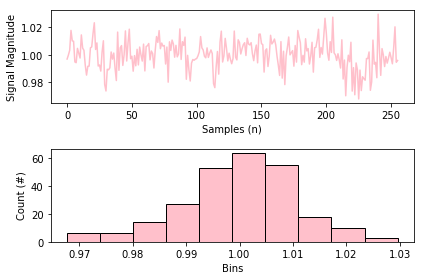

In [60]:
plt.subplot(211)
plt.plot(signal, color = 'pink')
plt.xlabel('Samples (n)')
plt.ylabel('Signal Magnitude')
plt.subplot(212)
plt.hist(signal, color = 'pink', ec = 'black')
plt.xlabel('Bins')
plt.ylabel('Count (#)')
plt.tight_layout()
plt.show()

#### b. Integrate the time series. 

<div class="alert alert-block alert-warning">$$y(k)=\sum_{i=1}^k [I(i) - I_{avg}]$$</div>

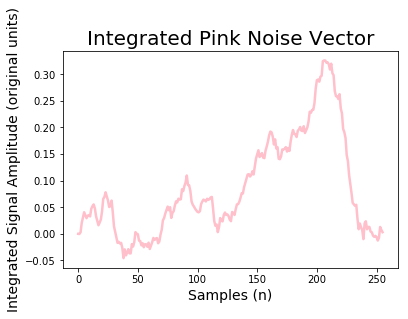

In [61]:
integ_sig = np.array([0]) #Create a numpy array to append results
i = 1 # Set a counter
cur_int = 0 
p = signal.shape[0] # get length of singal input
    
while i < p + 1:
    cur_int = signal[i] - np.mean(signal) #zero-base the signal
    integ_sig = np.append(integ_sig, integ_sig[i-1] + cur_int) # rectangle method 
    i = i + 1
    if i == p: # Avoid infinite while loop. 
        break
ni = integ_sig.shape[0]       
plt.plot(integ_sig, color = 'pink', linewidth = 2.5)
plt.title("Integrated Pink Noise Vector", fontsize=20)
plt.xlabel('Samples (n)', fontsize=14)
plt.ylabel('Integrated Signal Amplitude (original units)', fontsize=14)
plt.show()

In [62]:
## Calculate RMS for each box size ##
    
log_b = np.array([0])
log_r = np.array([0]) 
    

for box_size in range (box_min, box_max):
    j = np.floor_divide(ni,box_size) # set number of points per box.
    r = np.array([0])
        
    for i in range(0,j+1):
        z = np.arange(((box_size * i) - box_size), (box_size * i))
        seg = integ_sig[z]
            
        ## Calculate LOBF and RMS for each segment.
        rms = 0
        slope_num = 0
        slope_den = 0
        seg_pred = np.array([0])
            
        for k in range(0,box_size):
            slope_num = slope_num + ((z[k] - np.mean(z)) * (seg[k] - np.mean(z)))
            slope_den = slope_den + ((z[k] - np.mean(z))**2)
        np.seterr(divide='ignore', invalid='ignore')
        slope = slope_num / slope_den
        intercept = np.mean(seg) - (slope * np.mean(z))
            
        for l in range (0,box_size):
            seg_pred = np.append(seg_pred, intercept + (slope * z[l]))
        seg_pred = seg_pred[1:,]
            
        # Detrend the segmet of interest
        for m in range (0,box_size):
            rms = rms + ((seg[m] - seg_pred[m])**2)
            
        # calculate the root-mean square
        rms = rms / box_size
        rms = rms**0.5
        r = np.append(r, rms)
        
    #r = r[1:,]
    r = np.mean(r)
    log_b = np.append(log_b, np.log(box_size))
    log_r = np.append(log_r, np.log(r))
        
log_b = log_b[9:,]
log_r = log_r[9:,]

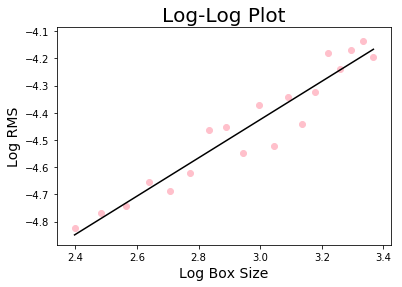

0.7


In [69]:
p = np.polyfit(log_b, log_r, 1)
plt.scatter(log_b, log_r, color = 'pink')
plt.plot(np.unique(log_b), np.poly1d(np.polyfit(log_b, log_r, 1))(np.unique(log_b)), color = 'black')
plt.title('Log-Log Plot', fontsize = 20)
#plt.text(30, 31, 'a=0.7',fontsize = 14)
plt.xlabel('Log Box Size', fontsize = 14)
plt.ylabel('Log RMS', fontsize = 14)

plt.show()
    
fractal_index = np.round_(p[0], 2)
print(fractal_index)
